# Are there specific genres associated to terrorism movies?

Each movie is associated with various genres. The genre of a movie is a way to categorize movies. It reflects the movie’s narrative elements, thematic content, stylistic approach, and the emotional response it aims to evoke in the audience. It allows audiences and film-makers to understand the type of content they can expect from a movie. 

Below, we describe each method that we will be using to analyze the association between genres and terrorism movies.
For each method, we describe what the method does, why it is interesting in the context of genres and terrorism movies and how it works.
We also do the necessary data pre-processing for each method, as well as the first visualizations.

First, let us describe each feature that we are using in our data set.

_W movie ID_: This is a unique identifier for each movie in the dataset. It does not carry any meaning beyond its use as an identifier.

_Movie Name_: This is the title of the movie. 

_Release Year_: This feature records the date when the movie was first released to the public.

_Countries_: This field lists the country of origin of each movie.

_Languages_: This indicates the language or languages spoken in the movie. 

_Genres_: This categorizes the movie into one or more predefined genres such as action, drama, thriller, etc. Genres help in classifying movies based on their narrative style, thematic elements, and the emotional response they are designed to elicit from the audience.

## 1. Frequency Analysis
__What It Does__: Frequency analysis counts how often each genre appears in movies about terrorism vs in the entire data set.

__Why It’s Interesting__: This method would provide a clear, quantitative measure of the association between genres and terrorism-themed movies. It could reveal if terrorism movies are associated with certain genres, like action or drama.

__How It Works__: We first filter our dataset for movies that are classified as related to terrorism. We do this by keyword search within movie descriptions. We define a list of keywords that are associated with terrorism, then only keep the movies whose plot contains at least one of these keywords. Then, we count the frequency of each genre within this subset and compare it to the overall frequency of genres in the entire dataset.

__Data Pre-Processing and Visualization__: We need to write a code that allows to count the genres. We also do a visualization of the top 10 most common genres in the entire data set vs in the filtered data set that only contains terrorism-related movies.

In this part, we will be doing 2 frequency analyses:
1) We use the entire CMU dataset to identify the 10 most common genres.
2) We use the filtered data set to identify the 10 most common genres of terrorism-related movies.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET
import json
import ast

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


First, we import the CMU dataset.

In [2]:
#import the data from movie.metadata and rename its columns
m_column_names = ['W_movie ID', 'F_movie ID', 'Movie name', 'Release date', 'Box office revenue', 'Runtime', 'Languages', 'Countries', 'Genres']
m_data = pd.read_csv('data/movie.metadata.tsv', delimiter= '\t',on_bad_lines='skip', names=m_column_names, header=0)
print(len(m_data))

81740


Next, we filter the data set to only obtain movies that are terrorism-related.

In [3]:
#Define the keywords that are associated with terrorism
keywords = [ "Terrorism", "Terrorist", "Terrorists", "Jihad", "Extremism", "Extremist", "Attacks", "Attack", "Bombs", 
            "Bombing", "Bombers", "Hijack", "Hijacking", "Kidnap", "Kidnapping", "Counterterrorism", "Counterterrorist",
            "Radicalization", "Radicalized", "Security Threat", "Political Violence", "Suicide Bomber", "War on Terror", 
            "Homeland Security", "National Security", "Intelligence Agencies", "Counterinsurgency", "Terrorist Cells", "Radical Ideology", 
            "Terrorist Plot", "Terrorist Organization", "Hostage Crisis", "Terrorism Investigation", "Counterterrorist Operation", "Radical",
            "Guerrilla Warfare", "Insurgency", "Terror Threat", "Covert Operations", "Political Unrest", "Martyrdom", "Cyberterrorism", 
            "Terrorism Financing", "Violent Extremism", "Terrorist Recruitment", "Suicide Attacks", "Terrorist Sleeper Cells", 
            "Counterterror Measures", "Clandestine Activities", "Security Intelligence" ]

# Define the path to the text file containing movie plots
file_path = 'data/plot_summaries.txt'

# Read the text file into a DataFrame
df = pd.read_csv(file_path, delimiter='\t', header= None)

# Define list of keywords
movie_ids=[]
# Create a new column in the DataFrame to store the count of keywords in each movie plot
for index, row in df.iterrows():
    movie_id = row[0]
    plot = row[1]
    # Check if the plot contains any of the keywords
    for keyword in keywords:
        if keyword.lower() in plot:
            movie_ids.append(movie_id)

#movie_ids corresponds to the list of IDs of the movies that are terrorism-related.

#remove duplicates
set_movie_ids = set(movie_ids)

#Filter the data to only keep movies that contain at least one keyword from the list in their plot summary
filtered_data = m_data[m_data['W_movie ID'].isin(set_movie_ids)][['W_movie ID','Movie name', 'Release date','Countries', 'Languages', 'Countries', 'Genres']]
filtered_data = filtered_data.sort_values(by=['Release date'])
print(len(filtered_data))

8626


In the entire data set, we have 81740 movies.
In the filtered data set, we have 8626 movies, which correspond to terrorism-related movies.

We don't need the exact release data of each movie. We only keep the release year of each movie.

In [4]:
filtered_data['Release year'] = filtered_data['Release date'].str[:4]

Now we remove the Release Data column, and the duplicate Countries column.

In [5]:
filtered_data = filtered_data.loc[:, ~filtered_data.columns.duplicated()]
filtered_data.drop(columns=['Release date'], axis=1, inplace=True)
filtered_data.head()

,W_movie ID,Movie name,Countries,Languages,Genres,Release year
42214,32986669,Robbery Under Arms,"{""/m/0chghy"": ""Australia""}","{""/m/06ppq"": ""Silent film""}","{""/m/06ppq"": ""Silent film"", ""/m/07s9rl0"": ""Dra...",1907
64189,7870349,Dr. Jekyll and Mr. Hyde,"{""/m/09c7w0"": ""United States of America""}","{""/m/06ppq"": ""Silent film""}","{""/m/02hmvc"": ""Short Film"", ""/m/06ppq"": ""Silen...",1908
70994,29391146,The Black Viper,"{""/m/09c7w0"": ""United States of America""}","{""/m/06ppq"": ""Silent film""}","{""/m/06ppq"": ""Silent film""}",1908
18652,28777800,The Englishman and the Girl,"{""/m/09c7w0"": ""United States of America""}","{""/m/06ppq"": ""Silent film"", ""/m/02h40lc"": ""Eng...","{""/m/02hmvc"": ""Short Film"", ""/m/06ppq"": ""Silen...",1910
45311,13254122,What the Daisy Said,"{""/m/09c7w0"": ""United States of America""}","{""/m/06ppq"": ""Silent film"", ""/m/02h40lc"": ""Eng...","{""/m/02hmvc"": ""Short Film"", ""/m/06ppq"": ""Silen...",1910


Finally, we remove the useless feature columns in the m_data data frame that contains all the movies.

In [6]:
m_data['Release year'] = m_data['Release date'].str[:4]
m_data.drop(columns=['F_movie ID','Box office revenue', 'Runtime', 'Release date'], axis=1, inplace=True)
m_data.head()

,W_movie ID,Movie name,Languages,Countries,Genres,Release year
0,3196793,Getting Away with Murder: The JonBenét Ramsey ...,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp...",2000
1,28463795,Brun bitter,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D...",1988
2,9363483,White Of The Eye,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic...",1987
3,261236,A Woman in Flames,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}",1983
4,13696889,The Gangsters,"{""/m/06ppq"": ""Silent film"", ""/m/02h40lc"": ""Eng...","{""/m/09c7w0"": ""United States of America""}","{""/m/02hmvc"": ""Short Film"", ""/m/06ppq"": ""Silen...",1913


Now, we start the genre analysis. We want to take a look at the top 10 most common genres in both the entire data set and the filtered data set that only contains terrorism-related movies.

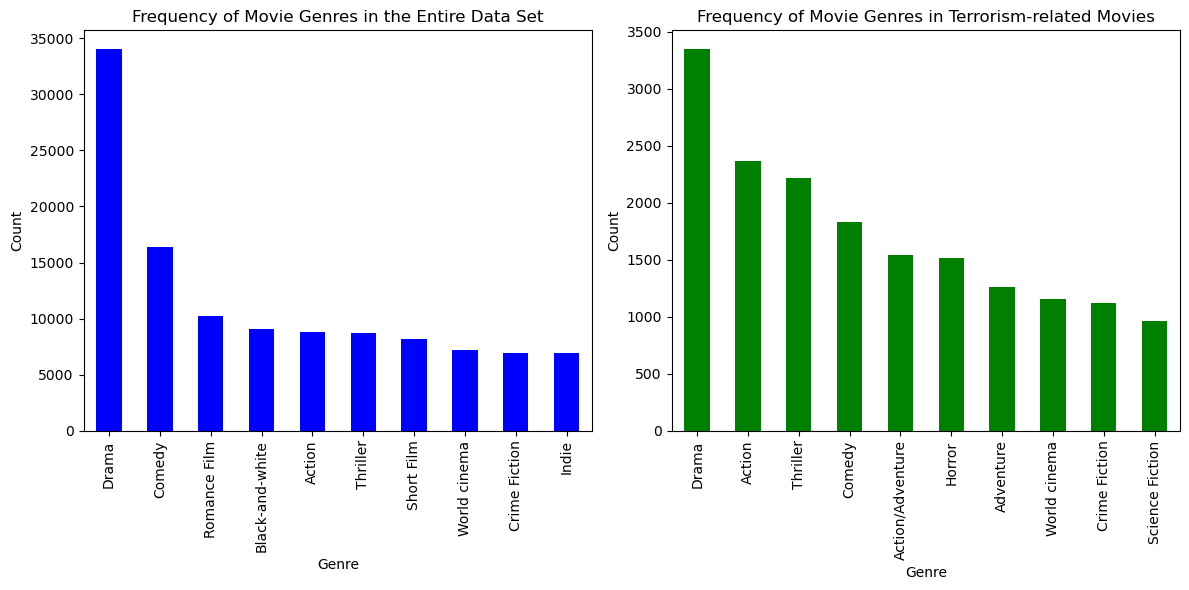

In [7]:
#Define a function to parse the genre column
def parse_genre(genre_str):
    try:
        # Convert the string representation of a dictionary into an actual dictionary
        genre_dict = ast.literal_eval(genre_str)
        # Return the values (genres) of the dictionary
        return list(genre_dict.values())
    except ValueError:
        # In case of any parsing error, return an empty list
        return []

#Entire data set
#Apply the function to each row in the genre column and flatten the list of lists
genres_series = m_data['Genres'].apply(parse_genre)
all_genres = [genre for sublist in genres_series for genre in sublist]

#Create a frequency count of each genre
genre_counts = pd.Series(all_genres).value_counts()

#Only keep the top 10 most common genres
top_10_m_data = genre_counts.nlargest(10)

#Filtered data set
#Apply the function to each row in the genre column and flatten the list of lists
genres_series = filtered_data['Genres'].apply(parse_genre)
all_genres = [genre for sublist in genres_series for genre in sublist]

#Create a frequency count of each genre
genre_counts = pd.Series(all_genres).value_counts()

#Only keep the genres that are present in more than 1000 movies
top_10_terrorism_movies = genre_counts.nlargest(10)

#Plot the barplots of movie genres in the entire data set vs in terrorism-related movies
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

top_10_m_data.plot(kind='bar', ax=axes[0], color='blue')
axes[0].set_title('Frequency of Movie Genres in the Entire Data Set')
axes[0].set_xlabel('Genre')
axes[0].set_ylabel('Count')

top_10_terrorism_movies.plot(kind='bar', ax=axes[1], color='green')
axes[1].set_title('Frequency of Movie Genres in Terrorism-related Movies')
axes[1].set_ylabel('Count')
axes[1].set_xlabel('Genre')

plt.tight_layout()
plt.show()


## Heatmap of genres of terrorism movies between different countries

__What It Does__: The heatmap will show the frequency of each genre for each country.

__Why It’s Interesting__: This method would provide a qualitative measure of the association between genres of terrorism-themed and countries. It could reveal if terrorism movies in the USA of the United Kingdom are associated with certain genres, like action or drama, etc.

__How It Works__: We look for the 10 countries that have the most terrorism-related movies. We create a matrix where each cell contains the count of movies for a particular genre in a particular country. Since we are only intered in these 10 countries, we filter the matrix to inclue just those. Then we plot the heatmap from the matrix.

__Data Pre-Processing and Visualization__: To prepare our data, we need to ensure that the dataset is structured so that each movie has a genre list and an associated country.

In [8]:
filtered_data.head()

,W_movie ID,Movie name,Countries,Languages,Genres,Release year
42214,32986669,Robbery Under Arms,"{""/m/0chghy"": ""Australia""}","{""/m/06ppq"": ""Silent film""}","{""/m/06ppq"": ""Silent film"", ""/m/07s9rl0"": ""Dra...",1907
64189,7870349,Dr. Jekyll and Mr. Hyde,"{""/m/09c7w0"": ""United States of America""}","{""/m/06ppq"": ""Silent film""}","{""/m/02hmvc"": ""Short Film"", ""/m/06ppq"": ""Silen...",1908
70994,29391146,The Black Viper,"{""/m/09c7w0"": ""United States of America""}","{""/m/06ppq"": ""Silent film""}","{""/m/06ppq"": ""Silent film""}",1908
18652,28777800,The Englishman and the Girl,"{""/m/09c7w0"": ""United States of America""}","{""/m/06ppq"": ""Silent film"", ""/m/02h40lc"": ""Eng...","{""/m/02hmvc"": ""Short Film"", ""/m/06ppq"": ""Silen...",1910
45311,13254122,What the Daisy Said,"{""/m/09c7w0"": ""United States of America""}","{""/m/06ppq"": ""Silent film"", ""/m/02h40lc"": ""Eng...","{""/m/02hmvc"": ""Short Film"", ""/m/06ppq"": ""Silen...",1910


First, let's start by identifying the 10 countries that have the most terrorism-related movies.

Text(0, 0.5, 'Movies')

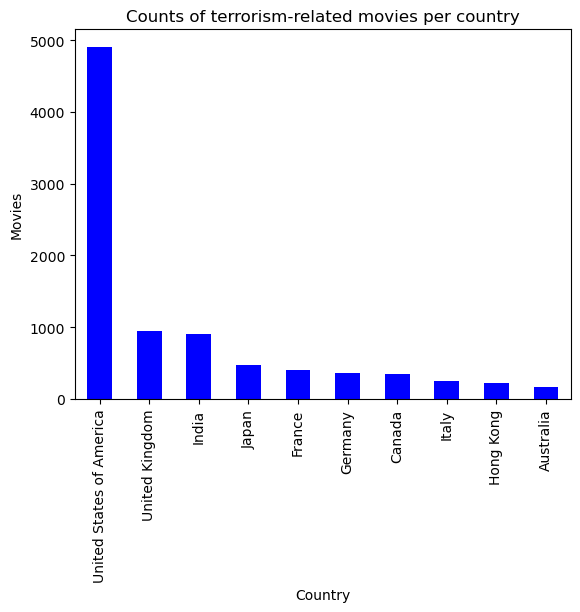

In [9]:
#Define a function to parse the 'Countries' column
def parse_countries(countries_str):
    try:
        # Convert the string representation of a dictionary into an actual dictionary
        countries_dict = ast.literal_eval(countries_str)
        # Return the values (country names) of the dictionary
        return list(countries_dict.values())
    except ValueError as e:
        # In case of any parsing error, return an empty list
        return []

#Apply the function to each row in the 'Countries' column
# This will create a Series of lists
countries_series = filtered_data['Countries'].apply(parse_countries)

#Explode the lists into separate rows
exploded_countries = countries_series.explode()

#Count the occurrences of each country
country_counts = exploded_countries.value_counts()

#Only keep the 10 countries that have the most movies
country_counts = country_counts.nlargest(10)

plt.figure()
country_counts.plot(kind='bar', color='blue')
plt.title('Counts of terrorism-related movies per country')
plt.xlabel('Country')
plt.ylabel('Movies')

These 10 countries are: United States of America, United Kingdom, India, Japan, France, Germany, Canada, Italy, Hong Kong, Australia.

In [10]:
json_cols = ["Languages", "Countries", "Genres"]
for col in json_cols:
    filtered_data[col] = filtered_data[col].apply(lambda x: list(json.loads(x).values()))

In [41]:
#Define a function that checks whether a list of countries contains at least one of the 10 countries we are interested in
def contains_countries_of_interest(lst):
    # List of countries of interest
    countries_of_interest = [
        "United States of America", "United Kingdom", "India", "Japan",
        "France", "Germany", "Canada", "Italy", "Hong Kong", "Australia"]
    if len(lst) == 1: return any(country in countries_of_interest for country in lst)
    else: return False

#Define a function that checks whether a list of genres contains at least one of the 10 genres we are interested in
def contains_genres_of_interest(lst):
    # List of countries of interest
    genres_of_interest = ['Drama', 'Action', 'Thriller', 'Comedy', 'Action/Adventure', 'Horror',
                          'Adventure', 'World cinema', 'Crime Fiction', 'Science Fiction']
    return any(genre in genres_of_interest for genre in lst)

temp = filtered_data[filtered_data['Countries'].apply(contains_countries_of_interest)]
movies_of_interest = temp[temp['Genres'].apply(contains_genres_of_interest)]
movies_of_interest


,W_movie ID,Movie name,Countries,Languages,Genres,Release year
42214,32986669,Robbery Under Arms,[Australia],[Silent film],"[Silent film, Drama]",1907
64189,7870349,Dr. Jekyll and Mr. Hyde,[United States of America],[Silent film],"[Short Film, Silent film, Horror, Indie, Black...",1908
18652,28777800,The Englishman and the Girl,[United States of America],"[Silent film, English Language]","[Short Film, Silent film, Comedy]",1910
45311,13254122,What the Daisy Said,[United States of America],"[Silent film, English Language]","[Short Film, Silent film, Drama, Indie, Black-...",1910
26378,7126772,Aerial Anarchists,[United Kingdom],"[Silent film, English Language]","[Short Film, Science Fiction, Silent film, Ind...",1911
...,...,...,...,...,...,...
79951,12050041,Maayajaalam,[India],[],[Drama],NaN
80009,14299402,The Blade Spares None,[Hong Kong],[Standard Mandarin],"[Action, Fantasy, Chinese Movies]",NaN
80735,16705375,The Seed,[United States of America],[English Language],"[Thriller, Short Film, Action, Fantasy]",NaN
81156,11971266,La Guerre des tuques,[Canada],[French Language],"[Children's/Family, Animal Picture, Comedy-dra...",NaN


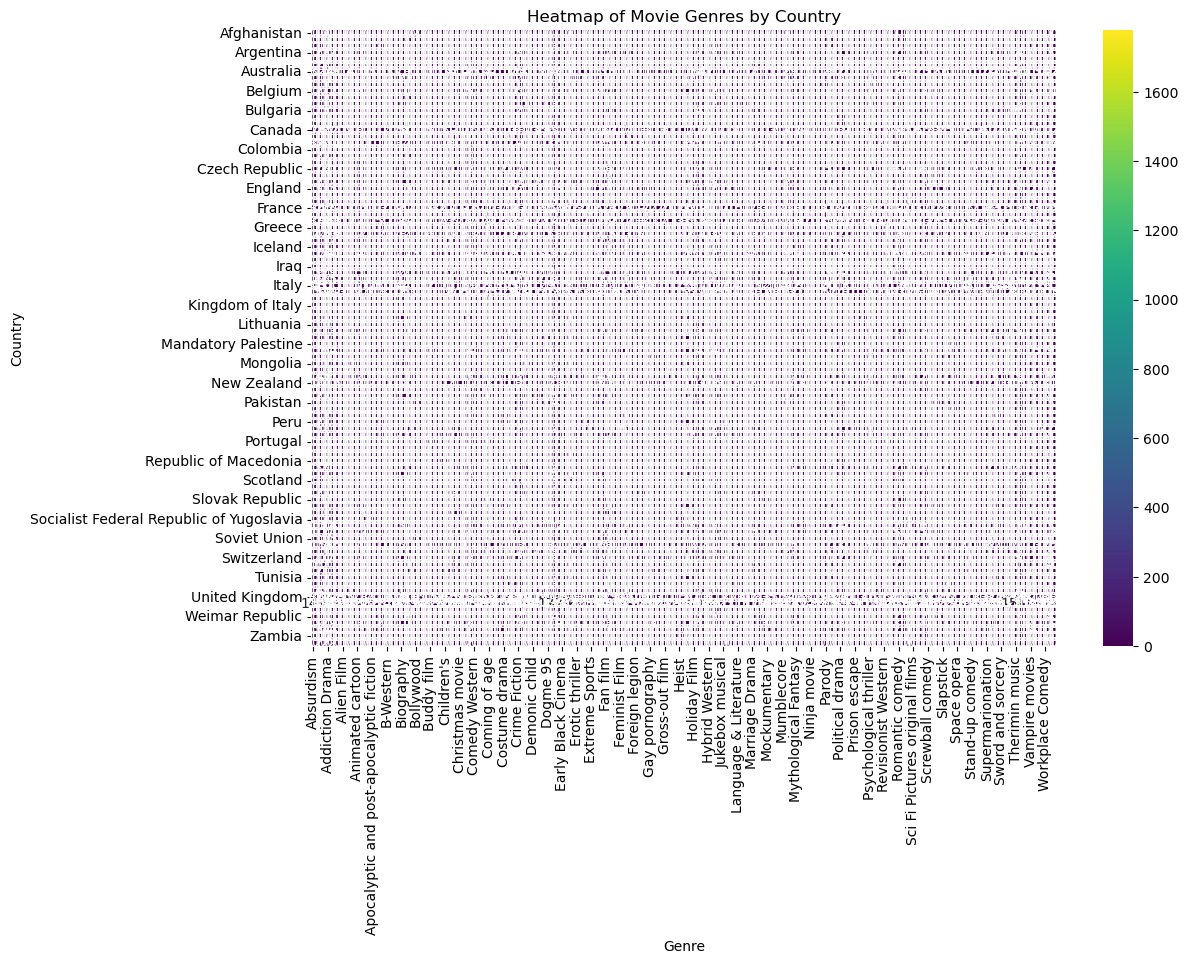

In [32]:
exploded_data = movies_of_interest.explode('Countries').explode('Genres')

# Create a pivot table with countries as rows, genres as columns, and counts as values
heatmap_set = pd.pivot_table(exploded_data, index='Countries', columns='Genres', aggfunc='size', fill_value=0)

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_set, annot=True, fmt='d', cmap='viridis')
plt.title('Heatmap of Movie Genres by Country')
plt.xlabel('Genre')
plt.ylabel('Country')
plt.show()

J'arrive pas à faire per world region

## 3. Chi-Square Test of Independence
__What It Does__: Tests whether there is a significant association between movie genres and their portrayal of terrorism.

__Why It’s Interesting__: This statistical test can validate whether any observed association between genres and terrorism portrayal is statistically significant, rather than due to random chance.

__How It Works__: The Chi-Square test will tell you whether the distribution of genres in terrorism-related movies is different from what would be expected if there was no association between genre and terrorism content.

__Data Pre-Processing Needed__: You will need a contingency table where one axis is genres and the other is a binary variable indicating whether the movie is terrorism-related.

